In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
ratings = pd.read_table('ratings.dat',sep='::',names=['user','movie','rating','time'], engine = 'python')
users = pd.read_table('users.dat',sep='::',names=['user','gender','age','occupation','zip'], engine = 'python')
movies = pd.read_table('movies.dat',sep='::',names=['movie','title','genre'], engine = 'python')

In [94]:
movielens = pd.merge(pd.merge(ratings,users),movies)

# Explore Gender Preference for different film genres

In [95]:
## Some genres of films got really few views, we should not consider them.
mean_ratings = movielens.pivot_table('rating',index=['genre'],columns='gender',aggfunc='mean')
temp = movielens.pivot_table('rating',index=['genre'],columns='gender',aggfunc='count')
temp[:10]

gender                                              F        M
genre                                                         
Action                                         1611.0  10700.0
Action|Adventure                               1978.0   8468.0
Action|Adventure|Animation                       64.0    281.0
Action|Adventure|Animation|Children's|Fantasy    41.0     94.0
Action|Adventure|Animation|Horror|Sci-Fi         71.0    547.0
Action|Adventure|Children's                       4.0     40.0
Action|Adventure|Children's|Comedy              123.0    395.0
Action|Adventure|Children's|Fantasy               7.0     37.0
Action|Adventure|Children's|Sci-Fi               55.0    295.0
Action|Adventure|Comedy                         433.0   1644.0

In [96]:
## Just use those genres with sufficient views, let's just get those genres which have at least 250 reviews.
ratings_count = movielens.groupby('genre').size()
len(ratings_count.index[ratings_count>250])

258

In [98]:
## See which genre men and women prefer
topM = mean_ratings[ratings_count>250].sort_values(by='M', ascending=False)[:5]
topF = mean_ratings[ratings_count>250].sort_values(by='F', ascending=False)[:5]

In [99]:
topM

gender                            F         M
genre                                        
Sci-Fi|War                 4.376623  4.464789
Animation|Comedy|Thriller  4.550802  4.445110
Film-Noir|Mystery          4.319444  4.381536
Adventure|War              4.187970  4.376633
Animation                  4.533333  4.353107

In [100]:
topF

gender                                     F         M
genre                                                 
Animation|Comedy|Thriller           4.550802  4.445110
Animation                           4.533333  4.353107
Film-Noir|Romance|Thriller          4.448718  4.211073
Sci-Fi|War                          4.376623  4.464789
Adventure|Children's|Drama|Musical  4.355030  4.203138

In [101]:
## Now explore the most diverse genres 

In [102]:
## Female Preferred than Male
ratings_active = mean_ratings[ratings_count>250]
ratings_active['diff'] = (ratings_active['F']-ratings_active['M'])
ratings_active.sort_values(by='diff',ascending=False)[:10]

/Users/geng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gender                                 F         M      diff
genre                                                       
Action|Comedy|Romance|Thriller  3.254717  2.578358  0.676359
Children's|Musical              3.859504  3.286325  0.573179
Comedy|Horror|Musical|Sci-Fi    3.673016  3.160131  0.512885
Adventure|Children's|Comedy     3.046083  2.567901  0.478182
Musical|Romance|War             3.887850  3.445087  0.442764
Comedy|Musical|Romance          3.715365  3.305873  0.409492
Children's                      3.173913  2.805714  0.368199
Action|Comedy|Musical|Sci-Fi    2.901408  2.543554  0.357854
Adventure|Children's            3.375000  3.024849  0.350151
Musical|Romance                 4.147281  3.803668  0.343613

In [50]:
## Male Preferred than Female
ratings_active = mean_ratings[ratings_count>250]
ratings_active['diff'] = (ratings_active['M']-ratings_active['F'])
ratings_active.sort_index(by='diff',ascending=False)[:10]

/Users/geng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/geng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


gender                                      F         M      diff
genre                                                            
Action|Adventure|Comedy|Horror       3.297297  3.909283  0.611985
Action|Western                       3.541667  4.144167  0.602500
Action|Comedy|Crime|Horror|Thriller  2.735714  3.232558  0.496844
Adventure|Animation|Sci-Fi|Thriller  3.511111  3.980344  0.469233
Action|Comedy|War                    2.873016  3.291971  0.418955
Action|Sci-Fi|Thriller|War           3.802083  4.186684  0.384601
Action|Adventure|Sci-Fi|War          2.802721  3.181102  0.378381
Action|Drama|Western                 2.555556  2.932773  0.377218
Action|Adventure|Animation           3.843750  4.217082  0.373332
Action|Drama|Thriller|War            2.574074  2.923077  0.349003

In [ ]:
## Another way to measure the differential is through the spread, otherwise known as the standard deviation.

In [52]:
std_ratings = movielens.pivot_table('rating',index=['genre'],columns='gender',aggfunc='std')

In [103]:
topM_std = std_ratings[ratings_count>250].sort_values(by='M', ascending=False)[:3]
topF_std = std_ratings[ratings_count>250].sort_values(by='F', ascending=False)[:3]

In [104]:
topM_std

gender                               F         M
genre                                           
Action|Horror                 1.146041  1.271567
Horror                        1.305745  1.268011
Action|Comedy|Musical|Sci-Fi  1.300054  1.264366

In [105]:
topF_std

gender                                       F         M
genre                                                   
Sci-Fi                                1.386618  1.209148
Action|Adventure|Sci-Fi|Thriller|War  1.374946  1.048801
Comedy|Drama|Sci-Fi                   1.333791  1.219125

Conclusion:

1. From this refined data, we can reorder and display the top rated genres by females and male. The top female averaged rated genre goes to 'Animation|Comedy|Thriller', with 'Animation' coming in second. 

2. 'Sci-Fi|War', 'Animation|Comedy|Thriller', 'Animation' are all listed in TOP 5 averaged rated genres of both female and male. So, users enjoying a movie would be more inclined to rate a movie, thus this subset of movies with 250+ ratings is slightly more biased than the original total data.

3. However, females and males did not rate different movie genres similarly. We can create a new variable, 'diff', for rating difference of males - females. Then we can sort the mean_ratings with the largest difference first. The biggest disparity in rating where female movie genre ratings measured higher than males belonged to 'Action|Comedy|Romance|Thriller', 'Children's|Musical', 'Comedy|Horror|Musical|Sci-Fi'. Conversely, if we flipped the order around, where the male ratings were higher than female ratings, the differential pointed to 'Action|Adventure|Comedy|Horror', 'Action|Western', and 'Action|Comedy|Crime|Horror|Thriller'. Both sets of films' genre, while good, cater stereo-typically to different genders.

4. Another way to measure the differential is through the spread, otherwise known as the standard deviation. For male, 'Action|Horror' took the top prize with the highest standard deviation of 1.271567. Therefore, the ratings male users assigned to 'Action|Horror' movies differed more among each other than for other genres; For female, 'Sci-Fi' undoubtly ranked the TOP 1 movie genre with the highest standard deviation of 1.386618.

5. Business Intelligence: when the company produces a particular  film, we can find its genre and tell them whether their marketing strategy should focus more on male or female users and the company will make profit when advertising to appropriate potential fans.

# Explore Ratings among different age groups

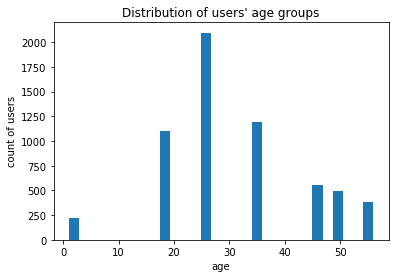

In [106]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' age groups")
plt.ylabel('count of users')
plt.xlabel('age');

In [107]:
movielens.groupby('age').agg({'rating': [np.size, np.mean]})

rating          
       size      mean
age                  
1     27211  3.549520
18   183536  3.507573
25   395556  3.545235
35   199003  3.618162
45    83633  3.638062
50    72490  3.714512
56    38780  3.766632

In [108]:
movielens.set_index('movie', inplace=True)

In [109]:
by_age = movielens.groupby(['genre', 'age'])
by_age.rating.mean().head(15)

genre                       age
Action                      1      3.393617
                            18     3.233253
                            25     3.282209
                            35     3.460765
                            45     3.442227
                            50     3.527273
                            56     3.566745
Action|Adventure            1      3.632035
                            18     3.636634
                            25     3.713771
                            35     3.642051
                            45     3.598513
                            50     3.734525
                            56     3.764706
Action|Adventure|Animation  1      4.636364
Name: rating, dtype: float64

In [110]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age                                          1         18        25        35  \
genre                                                                           
Action|Adventure|Comedy|Crime          3.185714  2.910747  3.142238  3.251101   
Action|Adventure|Comedy|Horror         4.000000  4.000000  3.801498  3.693182   
Action|Adventure|Comedy|Horror|Sci-Fi  3.652174  3.925651  3.817130  3.684932   
Action|Adventure|Comedy|Romance        3.816000  3.896080  3.835386  3.890459   
Action|Adventure|Comedy|Sci-Fi         3.840000  3.618677  3.665294  3.843496   
Action|Adventure|Comedy|War            2.466667  2.169811  2.150000  2.469388   
Action|Adventure|Crime                 2.870370  2.826804  2.887500  3.035599   
Action|Adventure|Crime|Drama           3.703704  3.853503  3.602941  3.397727   
Action|Adventure|Crime|Thriller        3.000000  2.836364  2.622449  2.926829   
Action|Adventure|Drama                 3.514286  3.013468  3.027331  3.476879   

age                                          45        50        56  
genre                                                                
Action|Adventure|Comedy|Crime          3.220779  3.375940  3.450000  
Action|Adventure|Comedy|Horror         3.937500  3.307692  1.500000  
Action|Adventure|Comedy|Horror|Sci-Fi  3.595238  3.607143  3.200000  
Action|Adventure|Comedy|Romance        3.834112  3.862745  3.956522  
Action|Adventure|Comedy|Sci-Fi         3.844560  3.977901  3.862069  
Action|Adventure|Comedy|War            2.214286  2.375000  2.333333  
Action|Adventure|Crime                 3.186275  3.073171  3.200000  
Action|Adventure|Crime|Drama           3.489130  3.365854  3.600000  
Action|Adventure|Crime|Thriller        2.900000  3.428571  3.000000  
Action|Adventure|Drama                 3.450382  3.890511  3.773333

Conclusion:

1. Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
2. Young users seem a bit more critical than other age groups.
3. We calculate the averaged rating genre for different age groups, movie company could look into the table and comes up with the marketing strategy that could attract users in certain age groups according to movie genres and make profit from those potential fans.

# Recommendation System using Matrix Factorization

In [111]:
R_df = ratings.pivot(index = 'user', columns ='movie', values = 'rating').fillna(0)
R_df.head()

movie  1     2     3     4     5     6     7     8     9     10    ...   3943  \
user                                                               ...          
1       5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
5       0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...    0.0   

movie  3944  3945  3946  3947  3948  3949  3950  3951  3952  
user                                                         
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3706 columns]

In [112]:
## de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array.
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [113]:
## do the singular value decomposition
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [114]:
sigma = np.diag(sigma)

In [115]:
## add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [116]:
def recommend_movies(predictions_df, user, movies, original_ratings, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = user - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user == (user)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie', right_on = 'movie').
                     sort_values(['rating'], ascending=False)
                 )

    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie'].isin(user_full['movie'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie',
               right_on = 'movie').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(preds_df, 800, movies, ratings, 10)

In [117]:
already_rated.head(10)

user  movie  rating       time  \
205   800   3398       5  975402146   
69    800    950       5  975402987   
86    800   3435       5  975404786   
163   800   1376       5  975403186   
164   800   1377       5  975403292   
82    800   2628       5  975405061   
177   800    107       5  975402220   
178   800   2527       5  975401577   
74    800   2291       5  975401817   
72    800    955       5  975403558   

                                                title  \
205                Muppets Take Manhattan, The (1984)   
69                               Thin Man, The (1934)   
86                            Double Indemnity (1944)   
163              Star Trek IV: The Voyage Home (1986)   
164                             Batman Returns (1992)   
82   Star Wars: Episode I - The Phantom Menace (1999)   
177                     Muppet Treasure Island (1996)   
178                                  Westworld (1973)   
74                         Edward Scissorhands (1990)   
72                            Bringing Up Baby (1938)   

                                   genre  
205                    Children's|Comedy  
69                               Mystery  
86                       Crime|Film-Noir  
163              Action|Adventure|Sci-Fi  
164        Action|Adventure|Comedy|Crime  
82       Action|Adventure|Fantasy|Sci-Fi  
177  Adventure|Children's|Comedy|Musical  
178       Action|Sci-Fi|Thriller|Western  
74                         Drama|Romance  
72                                Comedy

In [118]:
predictions

movie                                title  \
929    1029                         Dumbo (1941)   
931    1032           Alice in Wonderland (1951)   
544     596                     Pinocchio (1940)   
1885   2137               Charlotte's Web (1973)   
923    1019  20,000 Leagues Under the Sea (1954)   
2729   3034                    Robin Hood (1973)   
1219   1356      Star Trek: First Contact (1996)   
2351   2640                      Superman (1978)   
1786   2005                  Goonies, The (1985)   
974    1080  Monty Python's Life of Brian (1979)   

                                    genre  
929          Animation|Children's|Musical  
931          Animation|Children's|Musical  
544                  Animation|Children's  
1885                 Animation|Children's  
923   Adventure|Children's|Fantasy|Sci-Fi  
2729                 Animation|Children's  
1219              Action|Adventure|Sci-Fi  
2351              Action|Adventure|Sci-Fi  
1786         Adventure|Children's|Fantasy  
974                                Comedy

Business Intelligence:

We build such recommendation system to predict potential high rating movies that users have not rated yet. Movie companies can find users' individual taste or preference for the films and make particular marketing strategy for them. In this way the company could save a lot of money in advertising and achieve "precision marketing" which is the best approach to do data-driven business decision.